# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [37]:
raw_data = pd.read_csv('./Categorical.csv')
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [43]:
data = raw_data.copy()
data['continent'] = data['continent'].astype('category').cat.codes

data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


## Select the features

In [46]:
x = data.iloc[:, 3:4]
x

,continent
0,4
1,2
2,0
3,4
4,3
...,...
236,5
237,2
238,0
239,0


## Clustering

Use 4 clusters initially.

In [65]:
cluster = KMeans(7)
cluster.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [66]:
identified_clusters = cluster.fit_predict(x)
identified_clusters

array([5, 0, 2, 5, 4, 4, 4, 0, 3, 0, 1, 0, 1, 6, 5, 1, 4, 0, 2, 4, 2, 2,
       0, 4, 0, 5, 5, 4, 5, 4, 5, 5, 3, 3, 5, 0, 0, 2, 2, 4, 3, 0, 2, 2,
       2, 2, 1, 3, 2, 2, 5, 5, 5, 5, 0, 0, 4, 4, 2, 5, 4, 5, 2, 3, 2, 2,
       4, 4, 2, 4, 1, 3, 4, 4, 1, 2, 4, 0, 4, 2, 2, 2, 2, 2, 4, 5, 5, 5,
       1, 3, 0, 6, 5, 4, 5, 4, 0, 4, 0, 0, 6, 4, 0, 0, 4, 0, 4, 5, 4, 0,
       0, 0, 0, 2, 0, 0, 1, 5, 0, 4, 0, 0, 0, 2, 2, 5, 4, 0, 2, 4, 4, 4,
       0, 5, 2, 4, 4, 2, 6, 5, 1, 4, 2, 4, 0, 4, 0, 1, 2, 2, 5, 6, 2, 0,
       2, 1, 2, 1, 2, 5, 1, 4, 4, 0, 1, 1, 0, 0, 5, 1, 3, 0, 1, 1, 4, 5,
       0, 4, 3, 0, 1, 0, 4, 4, 2, 2, 0, 2, 2, 2, 0, 6, 6, 1, 2, 5, 4, 2,
       2, 5, 4, 2, 3, 4, 4, 4, 2, 5, 6, 0, 5, 2, 2, 0, 0, 0, 0, 1, 5, 2,
       0, 0, 2, 2, 4, 3, 5, 0, 4, 5, 3, 5, 5, 0, 1, 1, 1, 0, 2, 2, 2],
      dtype=int32)

In [67]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,4,5
1,Afghanistan,66.004734,33.835231,2,0
2,Angola,17.537368,-12.293361,0,2
3,Anguilla,-63.064989,18.223959,4,5
4,Albania,20.049834,41.142450,3,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,1
237,Yemen,47.586762,15.909280,2,0
238,South Africa,25.083901,-29.000341,0,2
239,Zambia,27.774759,-13.458242,0,2


## Plot the data

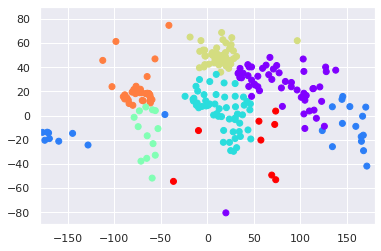

In [69]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.